# CS437 PA4 Part 4 - Zero-shot Image Classification with CLIP [20 Marks]

Roll Number:

Name:

<center>
    <img src="./assets/clip-diagram.png">
</center>

CLIP (Contrastive Language-Image Pre-training) is a deep learning model developed by OpenAI that enables zero-shot image classification. With CLIP, users can provide a natural language description of an image, and the model will use this information to identify and classify the image without the need for explicit training data.

In this notebook, we'll explore the basics of using CLIP for zero-shot image classification and demonstrate how to leverage this powerful tool in your projects.


In [25]:
# Imports here
from PIL import Image
import requests
import torch
from transformers import CLIPProcessor, CLIPModel
from IPython.display import clear_output
from pprint import pprint
import matplotlib.pyplot as plt

Here, we download the model and its *processor* from the HuggingFace Hub. This is all we need to be able to use the model without having to look into training or fine-tuning it.

In [3]:
# Download the model and processor here
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
clear_output()
print("Downloaded models!")

Downloaded models!


In the following cell, we download an image via a url and feed it to the model *alongside* the labels we want the model to use. Note how we have **not** trained it, and we are simply forcing it to only work with the image and labels we provide it.

Since the CLIP model has been pretrained on a huge amount of data, we find it actually performs **very well** on the inputs we feed it.

In [ ]:
# URL for an image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"

# Download the image (stream it in)
image = Image.open(requests.get(url, stream=True).raw)

# Provide the model processor the classes it should be predicting
classes = ["a photo of a cat", "a photo of a dog"]
inputs = processor(text=classes, images=image, return_tensors="pt", padding=True)

# Forward Pass
outputs = model(**inputs)

# Extract the logits and probabilities
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

# Print out the outputs
formatted_results = dict(zip(classes, probs.tolist()[0]))
pprint(formatted_results)

plt.figure(figsize=(12,10))
plt.imshow(image)
plt.axis(False)
plt.show()

Just take a second to absorb this. We did not feed in super generic class names like just `cat` and `dog` that any run-of-the-mill model was probably explicitly trained on. We fed in full sentences as class labels, and CLIP was able to generalize **very well** to our sample (just look at the huge margin between the two probabilities!).

Running this model was that simple using this framework. Your tasks now are to simply functionalize the above code (following the instructions in the docstring), and demonstrate its generalization capabilities via three examples.

Here's some pointers:
1. Try to do something fun. Don't just use an image of a car and have the model predict on `car` vs `not car`. That's lame.
2. Experiment with what happens when some of the classes can be very similar to one another. What if you feed an image of an animal, and the classes you provide are all very similar to one another (like an alligator vs. crocodile)?
3. Experiment with what happens when you provide in multiple classes. Does the model become less confident in its prediction when you provide in more classes? Is your answer true no matter what inputs you feed in?

You are not required to *actually* answer these questions. But definitely incorporate ideas from these in your examples. Do something that wows the person reading this (you'll get half marks for boring examples, full for fun ones).

## Functionalizing the Pipeline [5 Marks]

In [38]:
def predict_on_image(image_url, classes_to_predict_on, model=model):
    '''
    A function to classify an image using CLIP based on the classes provided.
    The class probabilities and the predicted class is returned.
    A plot is also made to show the image and provide information on the prediction in the title.
    '''
    
    # TODO: Download the image (stream it in or read it from your machine)
    image = ???
    
    # TODO: Provide the model processor the classes it should be predicting
    inputs = ???
    
    # TODO: Forward Pass
    outputs = ???
    
    # TODO: Extract the logits and probabilities
    logits_per_image = ???
    probs = ???
    
    # TODO: Extract the predicted class and the confidence
    # Hint: Use the argmax function to get the index of the highest probability and link with classes_to_predict_on
    class_pred = ???
    class_proba = ???
    
    plt.figure(figsize=(12,10))
    plt.imshow(image)
    plt.title(f"Predition:{class_pred}\nConfidence: {class_proba}")
    plt.axis(False)
    plt.show()

For your convenience, a boring example has been provided on what the function output should look like (just be mindful this is when we stream in an image).

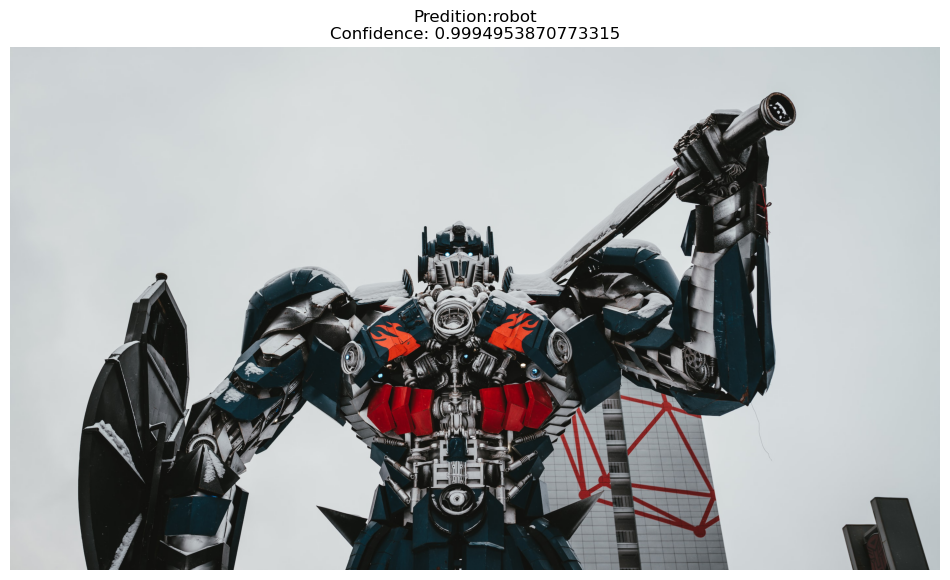

In [39]:
url = "https://images.unsplash.com/photo-1545548171-37a54e5c1ea6?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2832&q=80"
classes = ["robot", "cat"]
predict_on_image(url, classes, model)

## Example 1 [5 Marks]

## Example 2 [5 Marks]

## Example 3 [5 Marks]